In [1]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



In [2]:

train = pd.read_csv("C:\\Users\\bhimr\\OneDrive\\Documents\\XGBM & LGBM\\Titanic_train.csv")
test = pd.read_csv("C:\\Users\\bhimr\\OneDrive\\Documents\\XGBM & LGBM\\Titanic_test.csv")


In [3]:
#creating the titanic by merging train and test
titanic = pd.concat([train,test],ignore_index = True)

In [4]:
#EXPLORATORY DATA ANALYSIS
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [6]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
titanic.shape

(1309, 12)

In [8]:
titanic = titanic.drop(['PassengerId'],axis = 1)

In [9]:
titanic = titanic.drop(['Name'],axis = 1)


In [10]:
titanic = titanic.drop(['Ticket'],axis = 1)

In [11]:
titanic = titanic.drop(['Cabin','Parch'],axis = 1)

In [12]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0.0,3,male,22.0,1,7.2500,S
1,1.0,1,female,38.0,1,71.2833,C
2,1.0,3,female,26.0,0,7.9250,S
3,1.0,1,female,35.0,1,53.1000,S
4,0.0,3,male,35.0,0,8.0500,S


In [13]:
titanic['Sex'] = titanic['Sex'].map({'male':1,'female':0})

In [14]:
titanic['Embarked'] = titanic['Embarked'].map({'S':1,'C':2,'Q':3})

In [15]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0.0,3,1,22.0,1,7.2500,1.0
1,1.0,1,0,38.0,1,71.2833,2.0
2,1.0,3,0,26.0,0,7.9250,1.0
3,1.0,1,0,35.0,1,53.1000,1.0
4,0.0,3,1,35.0,0,8.0500,1.0


In [16]:
titanic.dtypes

Survived    float64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Fare        float64
Embarked    float64
dtype: object

In [17]:
titanic.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Fare          1
Embarked      2
dtype: int64

In [18]:
#Filling the null values
columns_to = ['Survived','Age','Fare','Embarked']
for column in columns_to:
    if column in titanic.columns:
        titanic[column].fillna(titanic[column].mean(),inplace = True)

C:\Users\bhimr\AppData\Local\Temp\ipykernel_14280\3658340257.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic[column].fillna(titanic[column].mean(),inplace = True)


In [19]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

In [20]:
titanic[titanic.duplicated()].shape

(150, 7)

In [21]:
titanic = titanic.drop_duplicates()

In [22]:
titanic[titanic.duplicated()].shape

(0, 7)

In [23]:
#Converting the columns to intege. Except Price
columns_to_convert = ['Survived', 'Fare', 'Age', 'Embarked','Sex','SibSp']

for column in columns_to_convert:
    titanic[column] = titanic[column].astype(int)

# Display the first few rows to verify
print(titanic.head())

   Survived  Pclass  Sex  Age  SibSp  Fare  Embarked
0         0       3    1   22      1     7         1
1         1       1    0   38      1    71         2
2         1       3    0   26      0     7         1
3         1       1    0   35      1    53         1
4         0       3    1   35      0     8         1


In [24]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
count,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000
mean,0.277826,2.236411,0.624676,29.821398,0.512511,35.513374,1.372735
std,0.448120,0.853330,0.484415,13.570071,0.968221,54.213019,0.624056
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,22.000000,0.000000,8.000000,1.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,15.000000,1.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,34.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,512.000000,3.000000


In [25]:
#Treating outliers
numerical_columns = titanic.columns
for column in numerical_columns:
    Q1 = titanic[column].quantile(0.25)
    Q3 = titanic[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    titanic[column] = np.where((titanic[column] < lower_bound) | (titanic[column] > upper_bound),titanic[column].mean(), titanic[column])

In [26]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
count,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000
mean,0.277826,2.236411,0.624676,28.716534,0.358607,21.640586,1.372735
std,0.448120,0.853330,0.484415,11.265123,0.537125,15.715819,0.624056
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,22.000000,0.000000,8.000000,1.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,15.000000,1.000000
75%,1.000000,3.000000,1.000000,34.500000,1.000000,34.000000,2.000000
max,1.000000,3.000000,1.000000,57.000000,2.000000,73.000000,3.000000


In [27]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
Survived,1.000000,-0.241918,-0.378502,-0.042352,0.068584,0.168690,0.030816
Pclass,-0.241918,1.000000,0.112474,-0.340986,-0.090898,-0.650365,-0.003453
Sex,-0.378502,0.112474,1.000000,0.065212,-0.151903,-0.160851,-0.105295
Age,-0.042352,-0.340986,0.065212,1.000000,-0.053999,0.123731,0.022768
SibSp,0.068584,-0.090898,-0.151903,-0.053999,1.000000,0.333468,-0.022654
Fare,0.168690,-0.650365,-0.160851,0.123731,0.333468,1.000000,-0.031795
Embarked,0.030816,-0.003453,-0.105295,0.022768,-0.022654,-0.031795,1.000000


In [28]:
x = titanic.iloc[:,1:]

In [29]:
y = titanic.iloc[:,0] 

In [30]:
y = y.astype(int)

In [31]:
#Standardization
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)  # Use fit_transform on training data
x = pd.DataFrame(x_scaled, columns=x.columns)

In [32]:
x

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0.895221,0.775131,-0.596481,1.194637,-0.931985,-0.597536
1,-1.449550,-1.290104,0.824445,1.194637,3.142103,1.005576
2,0.895221,-1.290104,-0.241250,-0.667930,-0.931985,-0.597536
3,-1.449550,-1.290104,0.558021,1.194637,1.996266,-0.597536
4,0.895221,0.775131,0.558021,-0.667930,-0.868327,-0.597536
...,...,...,...,...,...,...
1154,-1.449550,-1.290104,0.735637,1.194637,0.883109,2.608688
1155,0.895221,-1.290104,-0.063634,-0.667930,-0.931985,-0.597536
1156,-1.449550,-1.290104,0.913253,-0.667930,0.883109,1.005576
1157,0.895221,0.775131,0.824445,-0.667930,-0.931985,-0.597536


In [33]:
#splitting into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [34]:
#Model Evalution
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(y_true, y_pred, y_pred_proba=None, is_binary=True):
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='binary' if is_binary else 'weighted'):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='binary' if is_binary else 'weighted'):.2f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='binary' if is_binary else 'weighted'):.2f}")
    if is_binary and y_pred_proba is not None:
        print(f"AUC-ROC: {roc_auc_score(y_true, y_pred_proba):.2f}")



In [35]:
# XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)

# Predict and Evaluate
y_pred_xgb = xgb_model.predict(x_test)
y_pred_proba_xgb = xgb_model.predict_proba(x_test)[:, 1]  # For AUC-ROC
evaluate_model(y_test, y_pred_xgb, y_pred_proba_xgb)


Accuracy: 0.75
Precision: 0.58
Recall: 0.45
F1-Score: 0.50
AUC-ROC: 0.77


In [36]:
from sklearn.model_selection import RandomizedSearchCV
# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}
# Randomized search
random_xgb = RandomizedSearchCV(xgb.XGBClassifier(eval_metric='logloss'), 
                                param_distributions=param_grid_xgb, 
                                n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_xgb.fit(x_train, y_train)
print(f"Best Parameters (XGBoost): {random_xgb.best_params_}")
print(f"Best Score: {random_xgb.best_score_:.2f}")

Best Parameters (XGBoost): {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
Best Score: 0.76


[LightGBM] [Info] Number of positive: 255, number of negative: 672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 125
[LightGBM] [Info] Number of data points in the train set: 927, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275081 -> initscore=-0.968995
[LightGBM] [Info] Start training from score -0.968995
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


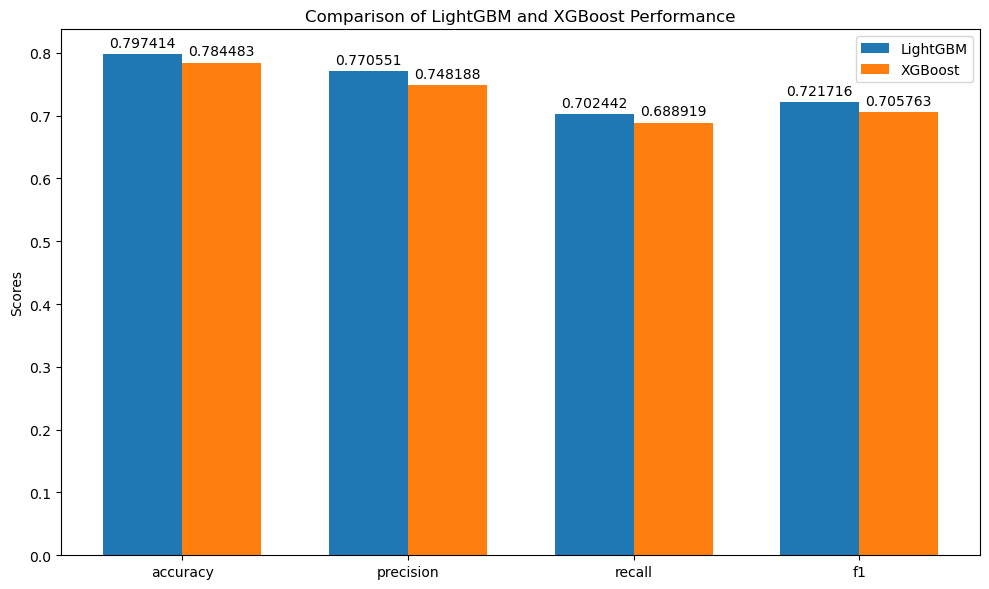

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have data split into train/test sets (X_train, X_test, y_train, y_test)

# LightGBM model
lgbm_model = lgb.LGBMClassifier(subsample=0.8, n_estimators=50, max_depth=3, learning_rate=0.1)
lgbm_model.fit(x_train, y_train)
lgbm_pred = lgbm_model.predict(x_test)

# XGBoost model
xgb_model = xgb.XGBClassifier(subsample=0.8, n_estimators=50, max_depth=3, learning_rate=0.1)
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

# Compute performance metrics for both models
def evaluate_model(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='macro'),
        'recall': recall_score(y_true, y_pred, average='macro'),
        'f1': f1_score(y_true, y_pred, average='macro')
    }

lgbm_metrics = evaluate_model(y_test, lgbm_pred)
xgb_metrics = evaluate_model(y_test, xgb_pred)

# Ensure the metrics are calculated
print("LightGBM Metrics:", lgbm_metrics)
print("XGBoost Metrics:", xgb_metrics)

# Prepare data for plotting
metrics = ['accuracy', 'precision', 'recall', 'f1']
lgbm_values = list(lgbm_metrics.values())
xgb_values = list(xgb_metrics.values())

# Create a bar chart
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, lgbm_values, width, label='LightGBM')
rects2 = ax.bar(x + width/2, xgb_values, width, label='XGBoost')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Comparison of LightGBM and XGBoost Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Label with label_type 'center' to align labels
ax.bar_label(rects1, padding=3, fontsize=10)
ax.bar_label(rects2, padding=3, fontsize=10)

plt.tight_layout()
plt.show()
